In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [38]:
data=pd.read_csv("gold_monthly_csv.csv")

In [39]:
data.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [41]:
data.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [42]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [43]:
data.shape

(847, 2)

In [44]:
# Date Range of Gold Prices

In [45]:
data.loc[:,"Date"][0] , data.loc[:,"Date"][len(data)-1]

('1950-01', '2020-07')

In [46]:
date=pd.date_range(start='1/1/1950',end= '8/1/2020',freq='M')

In [47]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [48]:
data['Month']=date
data.drop("Date",axis=1,inplace=True)
data=data.set_index('Month')
data.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


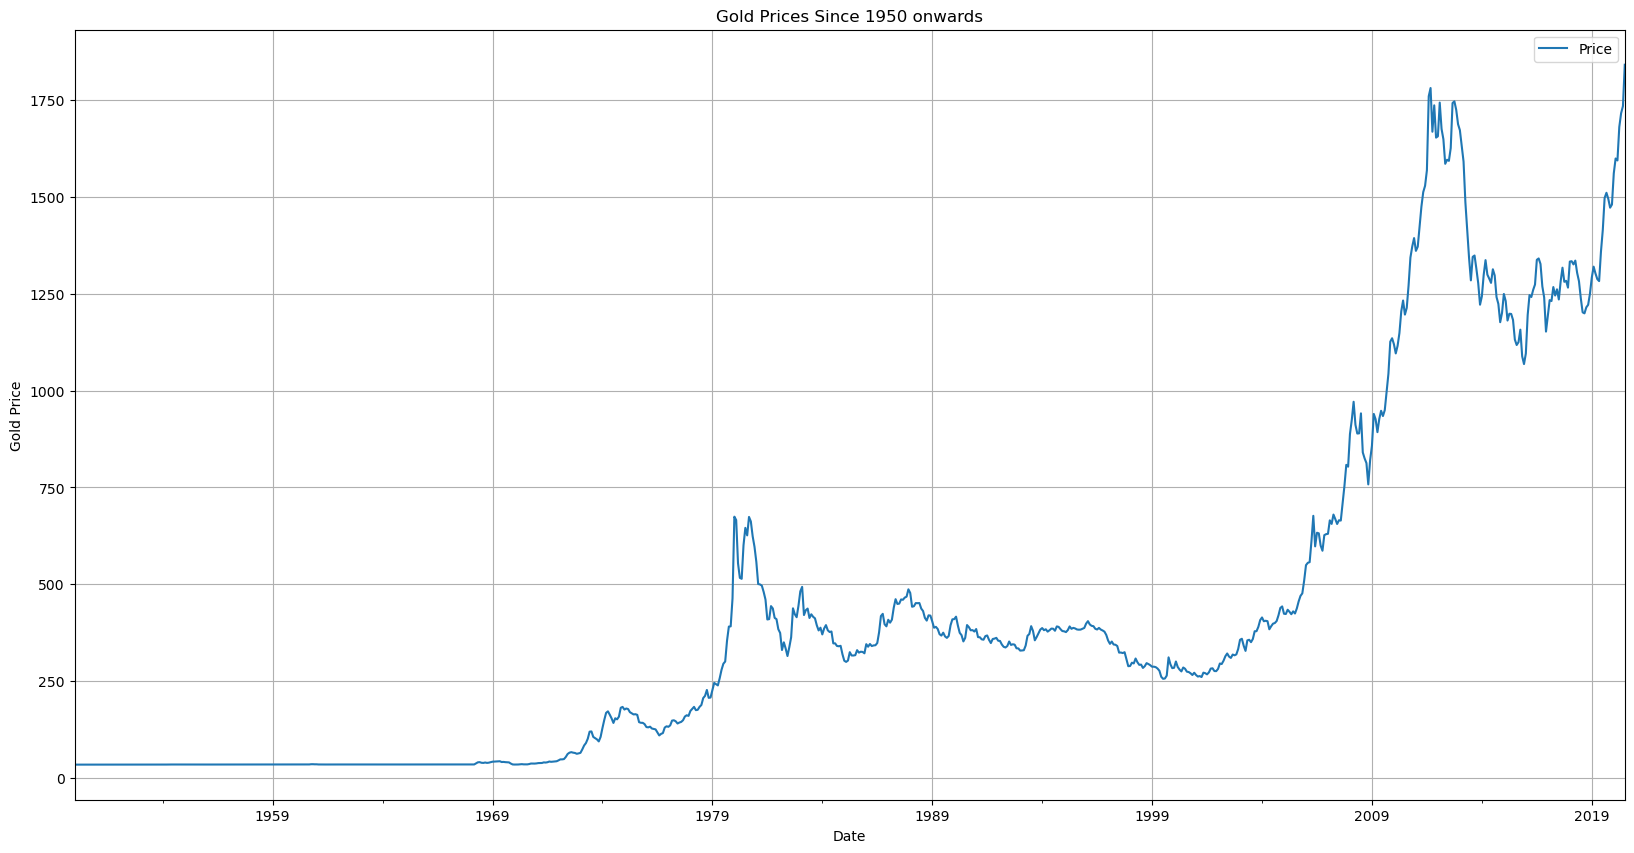

In [50]:
data.plot(figsize=(20,10))
plt.title('Gold Prices Since 1950 onwards')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid()

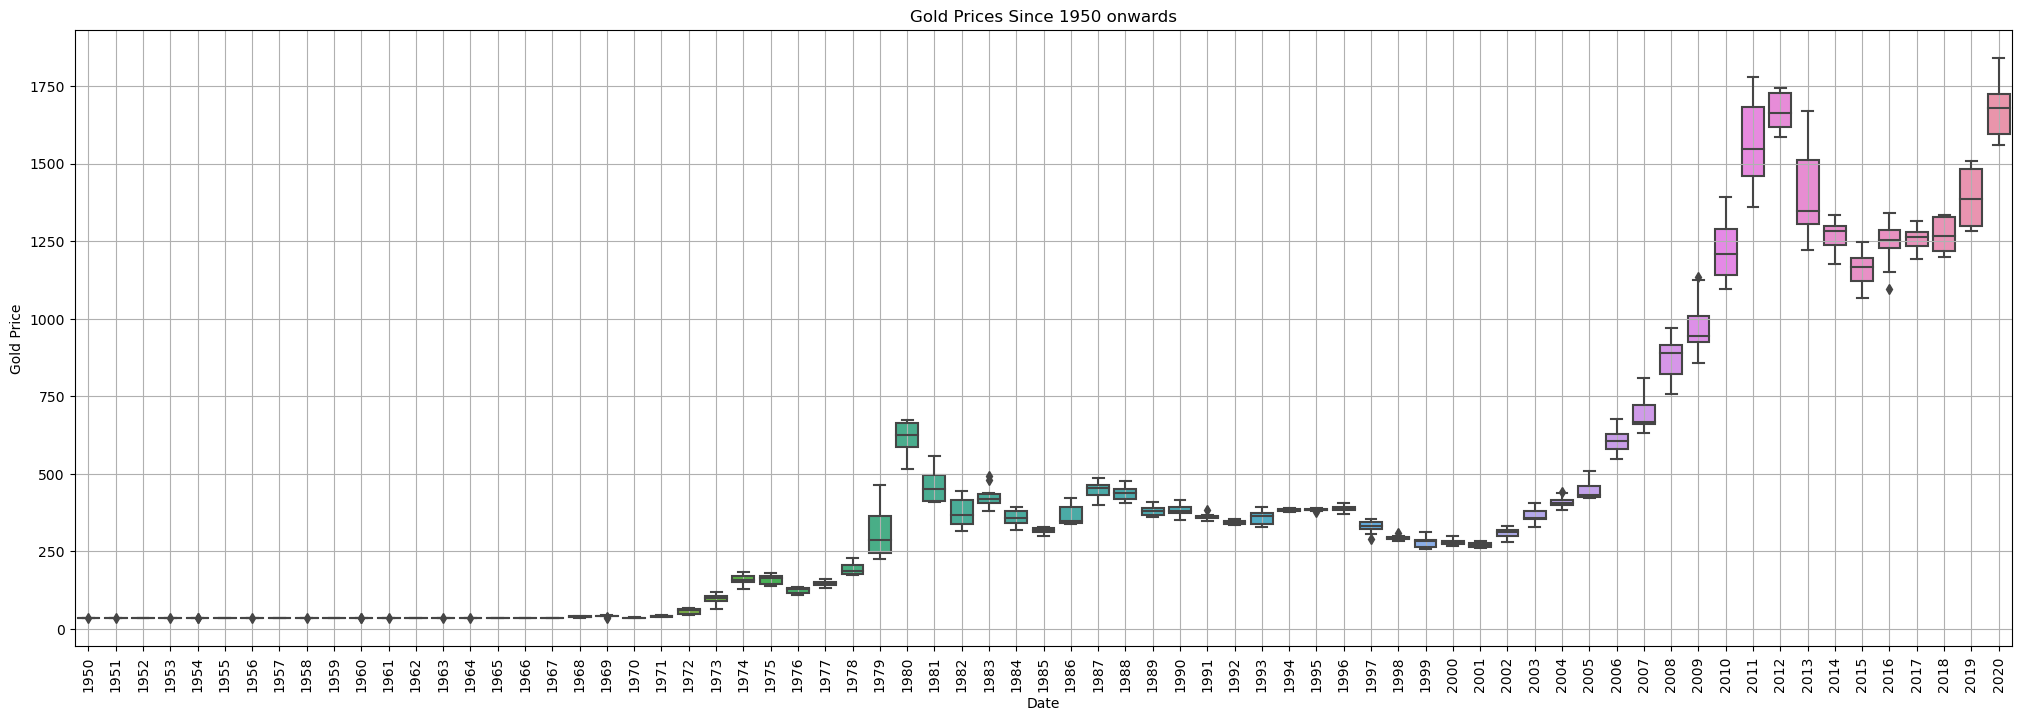

In [53]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=data.index.year,y=data.values[:,0],ax=ax)
plt.title('Gold Prices Since 1950 onwards')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.grid()

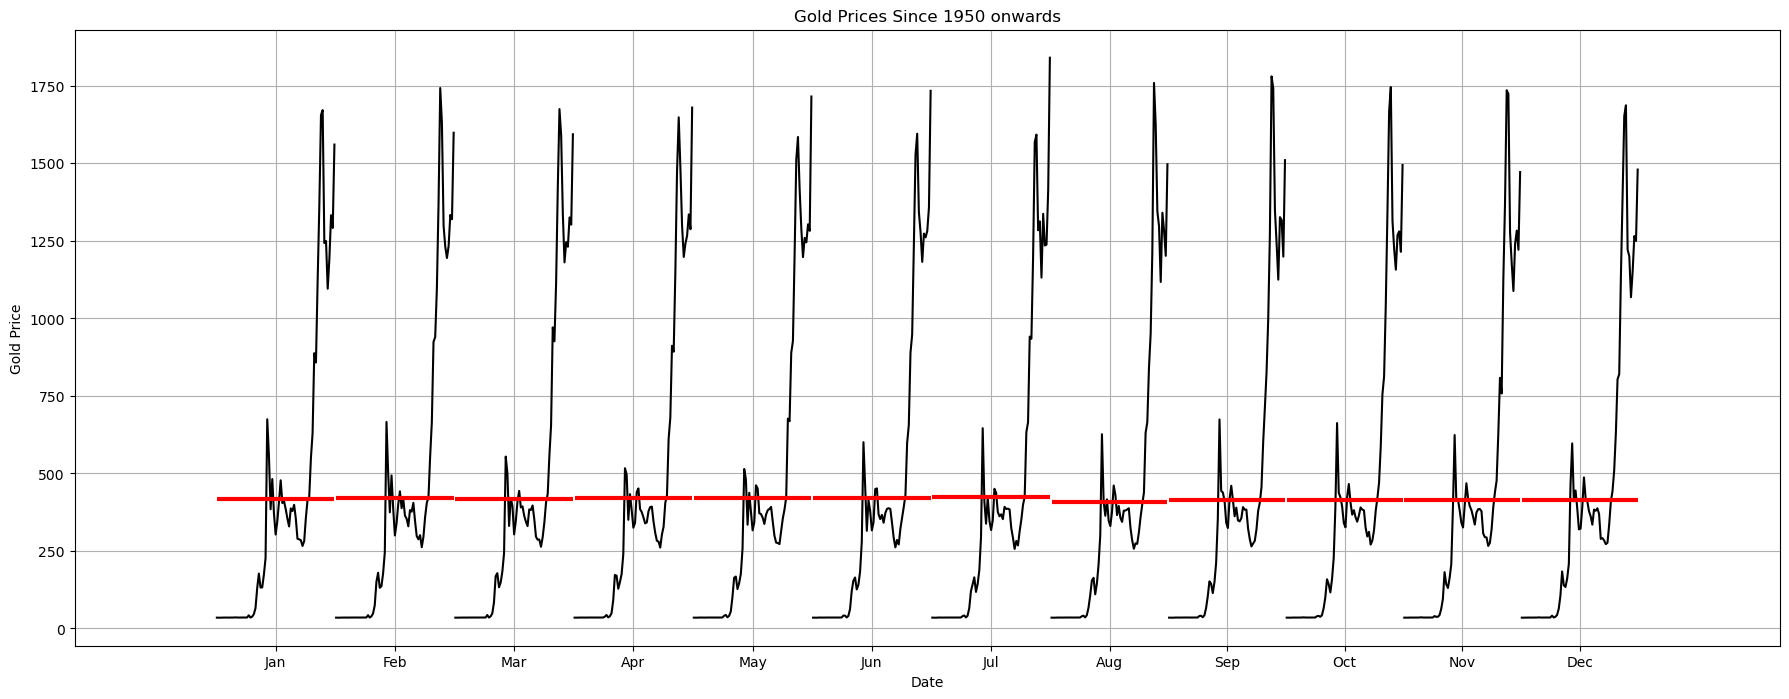

In [54]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(22,8))
month_plot(data,ylabel="Gold Price",ax=ax )
plt.title('Gold Prices Since 1950 onwards')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.grid()

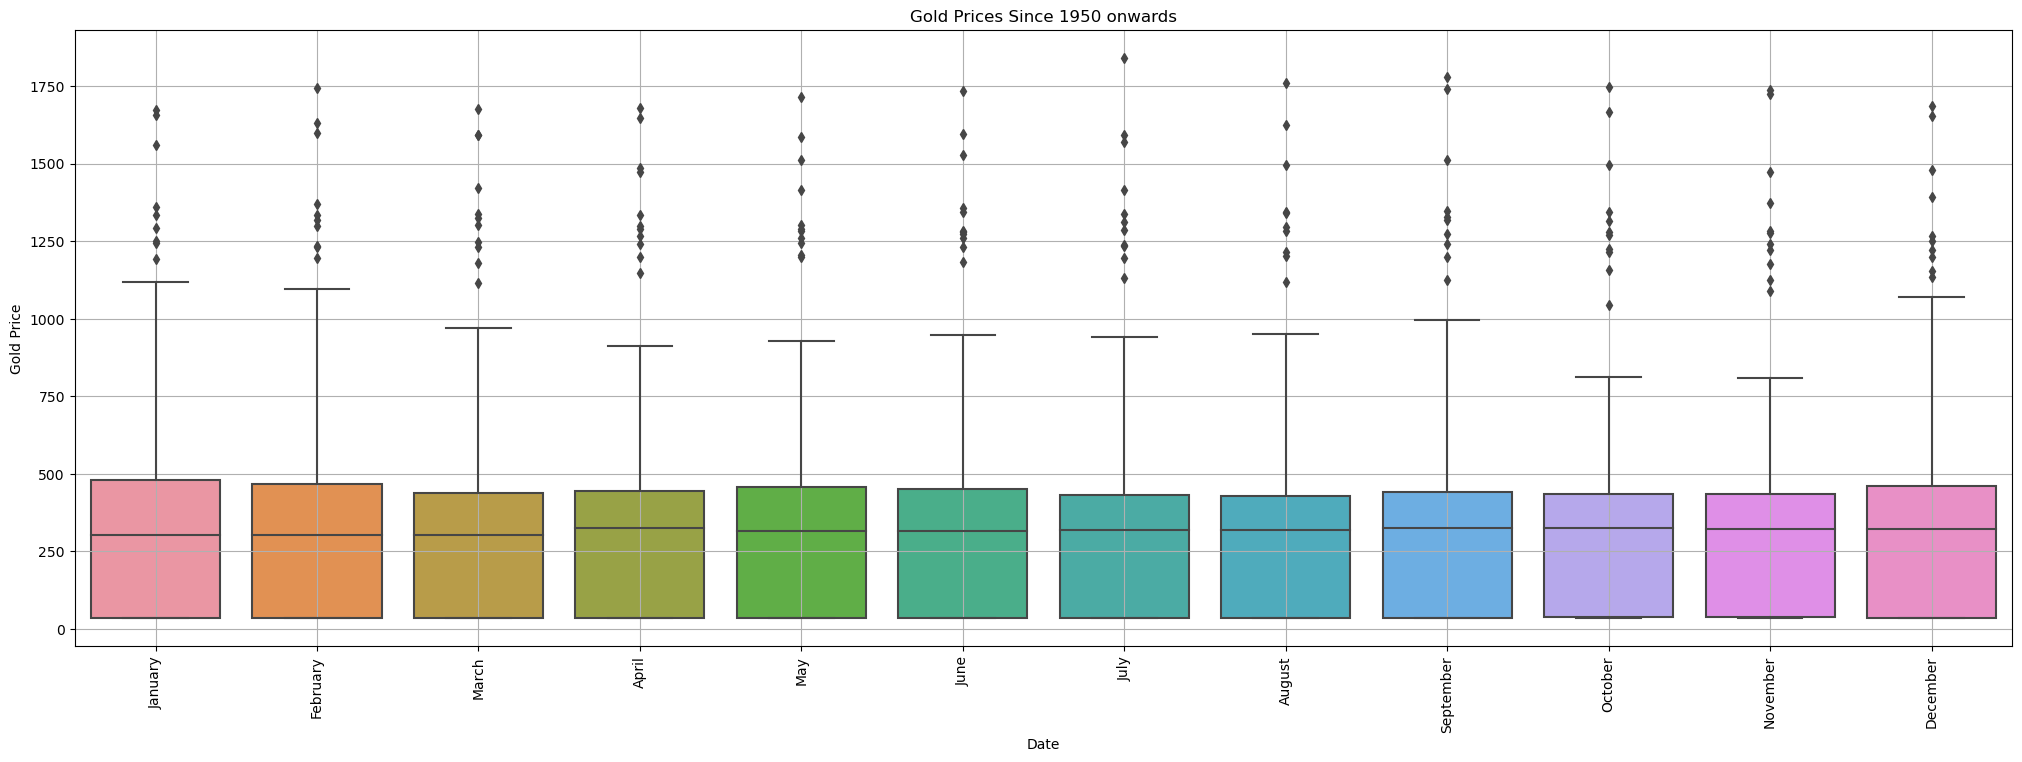

In [55]:
_,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=data.index.month_name(),y=data.values[:,0],ax=ax)
plt.title('Gold Prices Since 1950 onwards')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.grid()

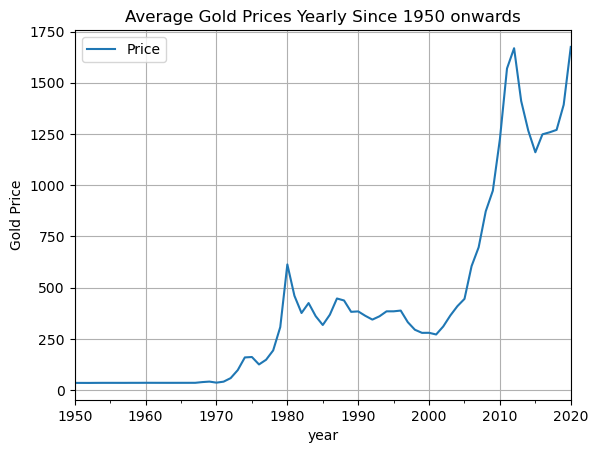

In [56]:
data_yearly_sum=data.resample('A').mean()
data_yearly_sum.plot()
plt.title('Average Gold Prices Yearly Since 1950 onwards')
plt.xlabel('year')
plt.ylabel('Gold Price')
plt.grid()

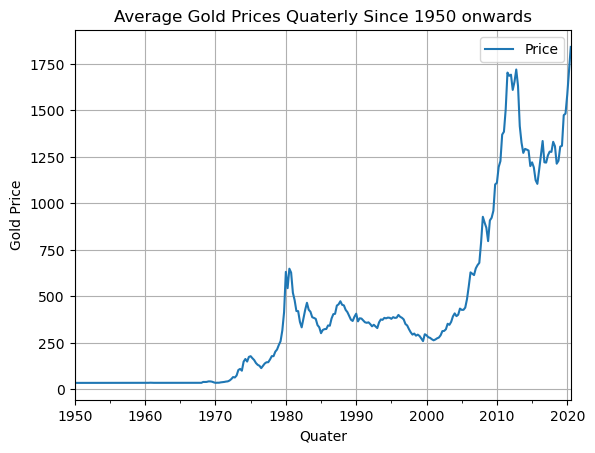

In [58]:
data_quaterly_sum=data.resample('Q').mean()
data_quaterly_sum.plot()
plt.title('Average Gold Prices Quaterly Since 1950 onwards')
plt.xlabel('Quater')
plt.ylabel('Gold Price')
plt.grid()

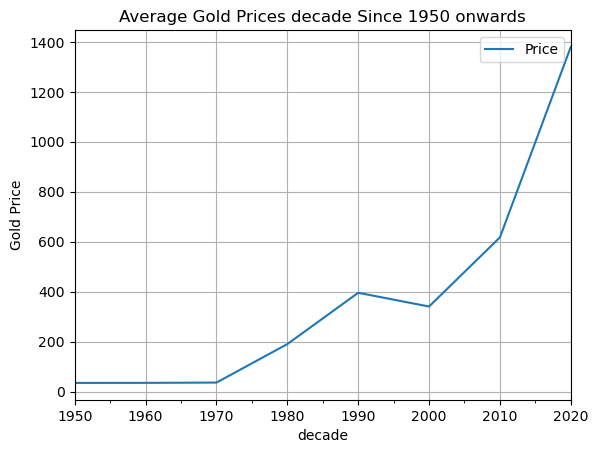

In [59]:
data_decade_sum=data.resample('10Y').mean()
data_decade_sum.plot()
plt.title('Average Gold Prices decade Since 1950 onwards')
plt.xlabel('decade')
plt.ylabel('Gold Price')
plt.grid()

In [64]:
df=data.groupby(data.index.year).mean().rename(columns={"Price":"Mean"})
df=df.merge(data.groupby(data.index.year).std().rename(columns={"Price":"Std"}),left_index=True,right_index=True)
df["COV_PCT"]=((df['Std']/df["Mean"])*100).round(2)
df.head()

,Mean,Std,COV_PCT
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


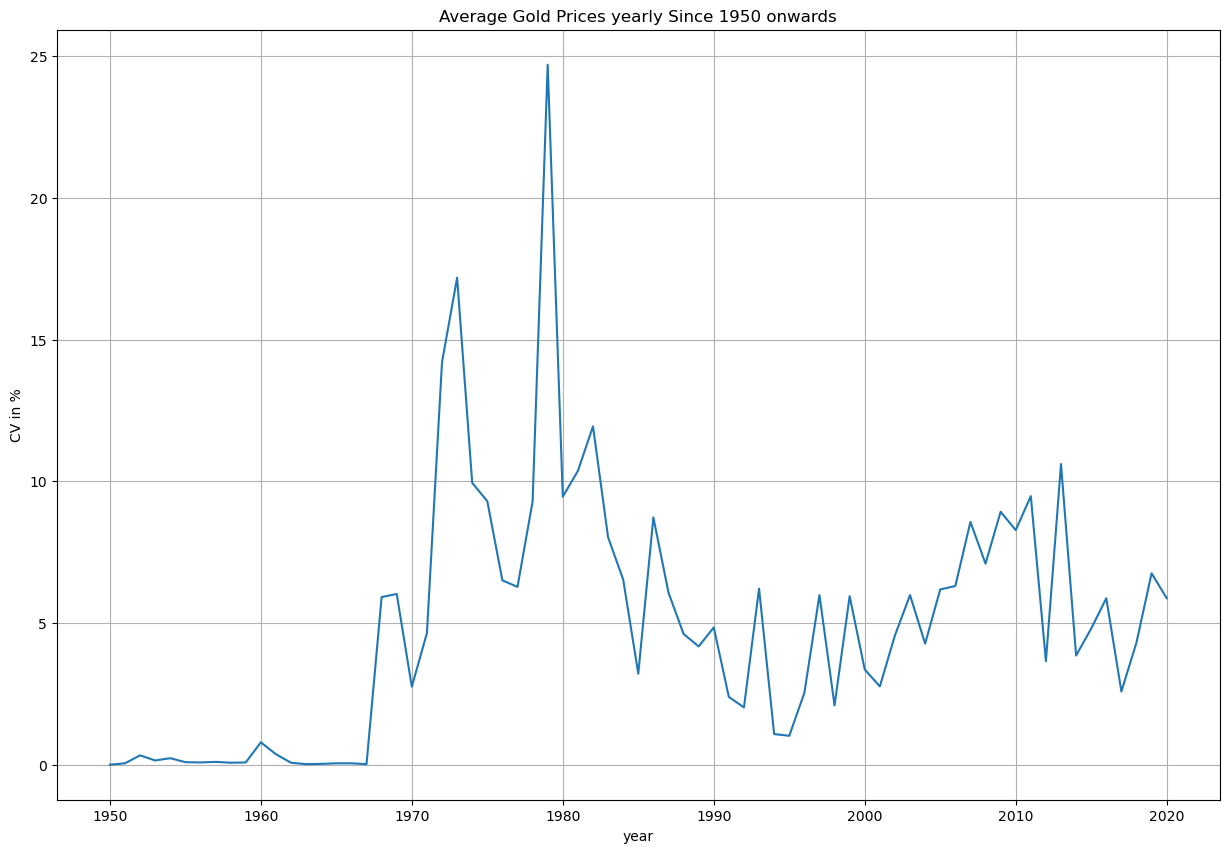

In [65]:
fig,ax=plt.subplots(figsize=(15,10))
df["COV_PCT"].plot()
plt.title('Average Gold Prices yearly Since 1950 onwards')
plt.xlabel('year')
plt.ylabel('CV in %')
plt.grid()

In [66]:
train=data[data.index.year<=2015]
test=data[data.index.year>2015]

In [67]:
train.shape

(792, 1)

In [68]:
test.shape

(55, 1)

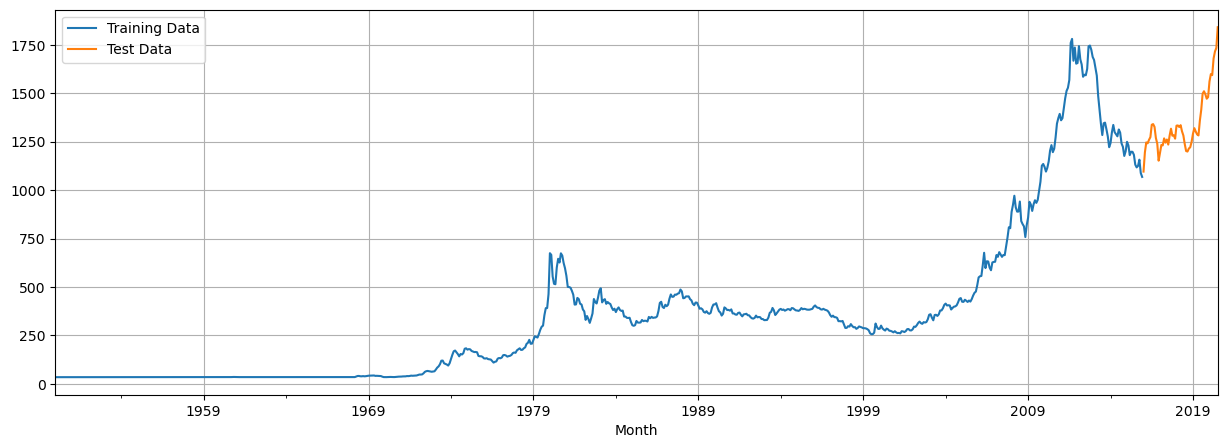

In [70]:
train['Price'].plot(figsize=(15,5))
test['Price'].plot(figsize=(15,5))
plt.grid()
plt.legend(["Training Data","Test Data"])
plt.show()

In [75]:
# Fit the Model(Linear Regression)

In [78]:
train_time=[i+1 for i in range(len(train))]
test_time=[1+len(train)+1 for i in range(len(test))]

In [79]:
LR_train=train.copy()
LR_test=test.copy()

In [80]:
LR_train['time']=train_time
LR_test['time']=test_time

In [89]:
model=LinearRegression()
model.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

In [91]:
test_prediction=model.predict(LR_test[['time']])

In [92]:
test_prediction

array([896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016,
       896.8809016, 896.8809016, 896.8809016, 896.8809016, 896.8809016])

In [93]:
LR_test["forcast"]=test_prediction

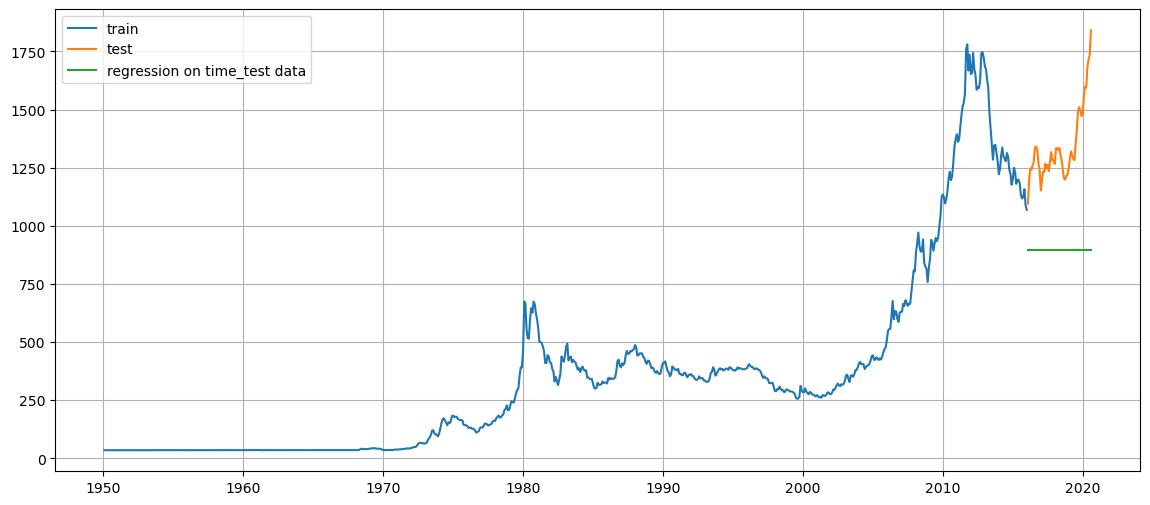

In [95]:
plt.figure(figsize=(14,6))
plt.plot(train["Price"],label="train")
plt.plot(test["Price"],label="test")
plt.plot(LR_test["forcast"],label="regression on time_test data")
plt.legend()
plt.grid()

In [96]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [97]:
mape_model_test=mape(test['Price'].values,test_prediction)

In [98]:
mape_model_test

32.32

In [99]:
Naive_train=train.copy()
Naive_test=test.copy()

In [101]:
Naive_test['naive']=np.asarray(train["Price"])[len(np.asarray(train["Price"]))-1]
Naive_test['naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

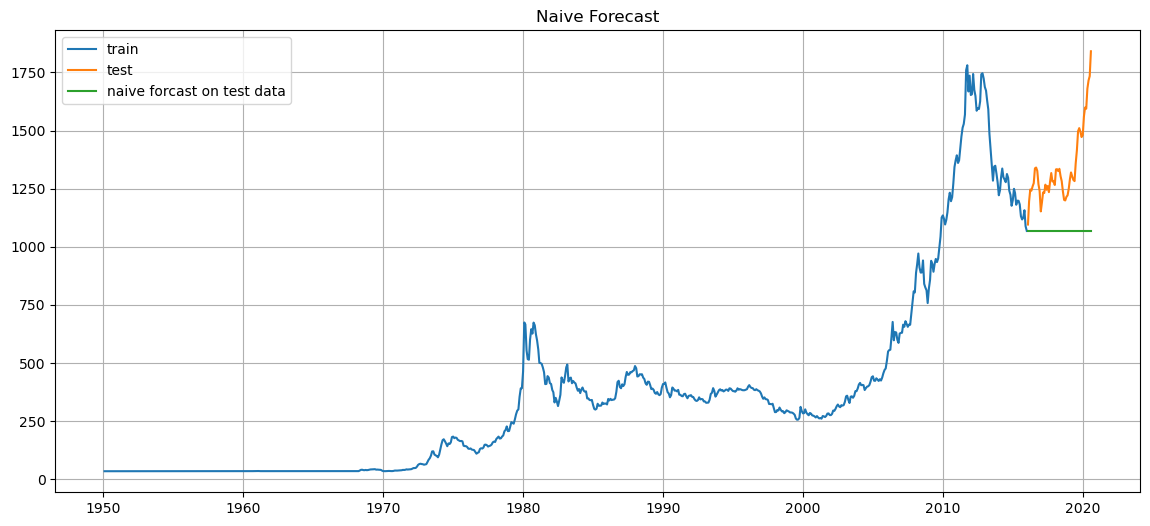

In [102]:
plt.figure(figsize=(14,6))
plt.plot(Naive_train["Price"],label="train")
plt.plot(test["Price"],label="test")
plt.plot(Naive_test["naive"],label="naive forcast on test data")
plt.legend()
plt.title('Naive Forecast')
plt.grid()

In [103]:
mape_model_test_2=mape(test['Price'].values,Naive_test['naive'].values)

In [104]:
mape_model_test_2

19.38

In [105]:
# Final Forecasting

In [106]:
final_model=ExponentialSmoothing(data,trend="additive",seasonal="additive").fit(smoothing_level=0.4,smoothing_trend=0.3,smoothing_seasonal=0.6)

In [107]:
Mape_final_model=mape(data['Price'].values,final_model.fittedvalues)

In [108]:
Mape_final_model

17.24

In [109]:
predictions=final_model.forecast(steps=len(test))

In [111]:
pred_df=pd.DataFrame({'Lower_CI':predictions-1.96*np.std(final_model.resid,ddof=1),
                     'Prediction':predictions,
                      'Upper_CI':predictions+1.96*np.std(final_model.resid,ddof=1)
                     })

In [115]:
pred_df.head(10)

,Lower_CI,Prediction,Upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154
2021-01-31,1514.403893,1622.554865,1730.705837
2021-02-28,1545.337867,1653.488839,1761.639811
2021-03-31,1556.749789,1664.900761,1773.051733
2021-04-30,1648.295729,1756.446701,1864.597673
2021-05-31,1694.212521,1802.363493,1910.514465


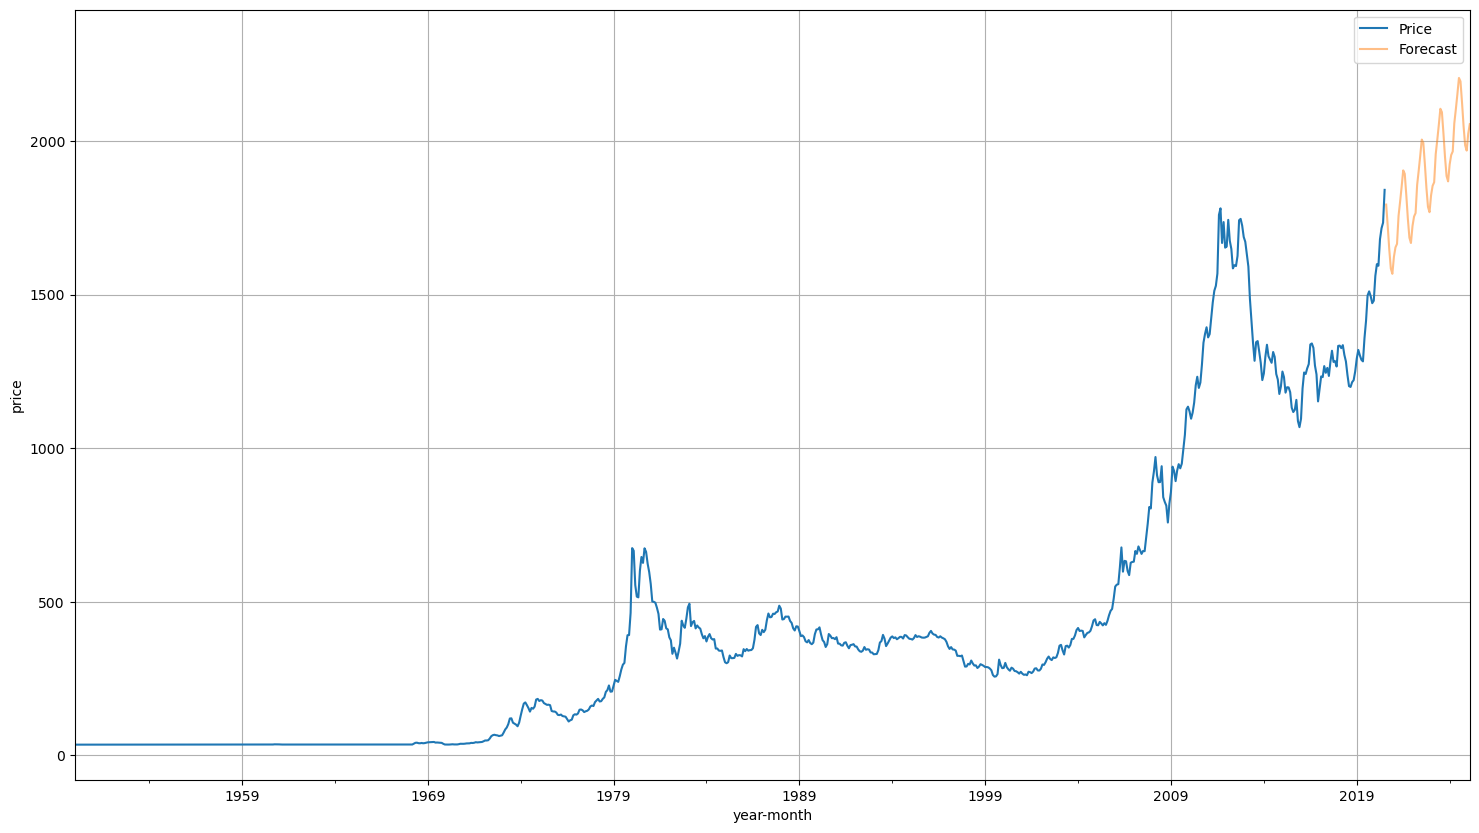

In [121]:
axis=data.plot(label="Actual",figsize=(18,10))
pred_df['Prediction'].plot(ax=axis,label="Forecast",alpha=0.5)
axis.fill_between(pred_df.index,pred_df['Lower_CI'],pred_df['Upper_CI'],alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend()
plt.grid()